In [55]:
# https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

import plotly.express as px

import sklearn.model_selection
import numpy as np

from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import QuantileTransformer, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
import sklearn.metrics


RANDOM_STATE = 42
DATASET_YEAR = 2010

In [56]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

In [57]:
target_column = 'SalePrice'
y=train_df[target_column]

y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [58]:
# How many numerical columns is there in this dataset?
# Select numerical columns only for numerical_df
# Tips: You can use select_dtypes in pandas to filter out numerical columns
numerical_train = train_df.select_dtypes (include = 'number')
numerical_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,366,0,112,0,0,0,0,4,2010,142125


In [59]:
# Feature engineering - Encode non numerical columns
# How many categorical columns is there in this dataset?
# Tips: You can use select_dtypes in pandas to filter out numerical columns
categorical_df = train_df.select_dtypes(exclude='number')
categorical_features = categorical_df.columns
categorical_df['Condition1'].value_counts()

Condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: count, dtype: int64

In [60]:
categorical_df

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [61]:
# One Hot encode
# Tips: You can either use SKlearn OneHotEncoder (but the .transform method will be a sparse matrix not a dataframe)
# or you can use get_dummies method from pandas

ohe_df=  pd.get_dummies (categorical_df)
ohe_df

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
2,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
3,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,True,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1456,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1457,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1458,False,False,False,True,False,False,True,False,False,False,...,False,False,False,True,False,False,False,False,True,False


In [62]:
# Feature engineering - transform numerical columns (at least log transform on area features)
# Find all areas features
area_features = [col for col in numerical_train.columns if 'Porch' in col or 'SF' in col or 'Area' in col]
area_features

['LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea']

LotArea


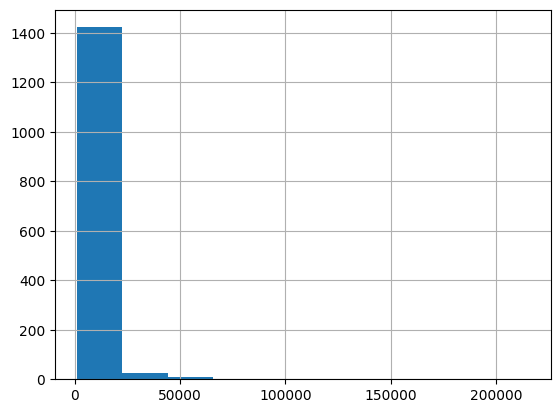

MasVnrArea


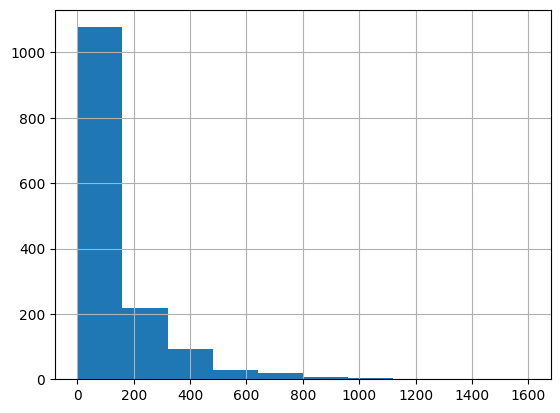

BsmtFinSF1


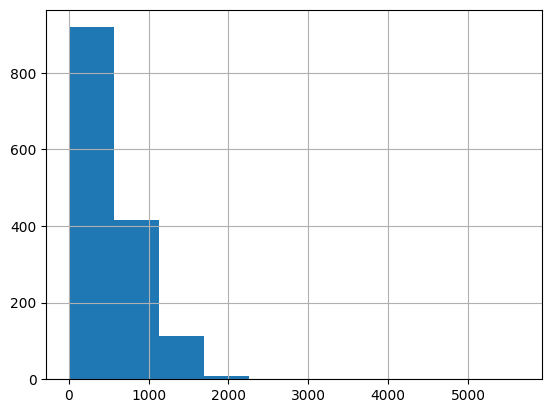

BsmtFinSF2


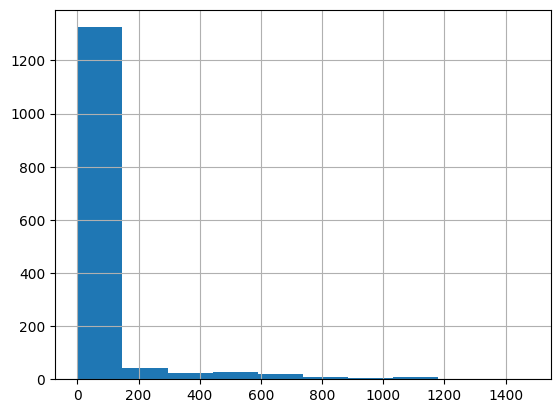

BsmtUnfSF


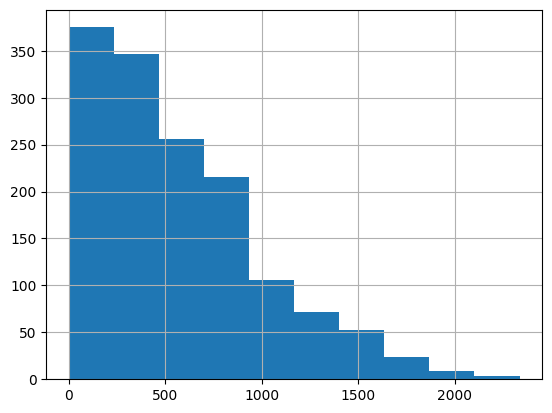

TotalBsmtSF


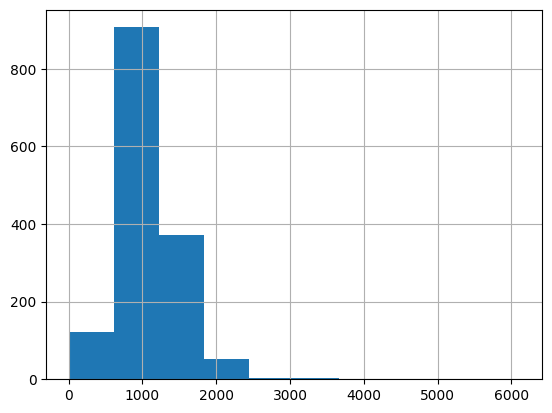

1stFlrSF


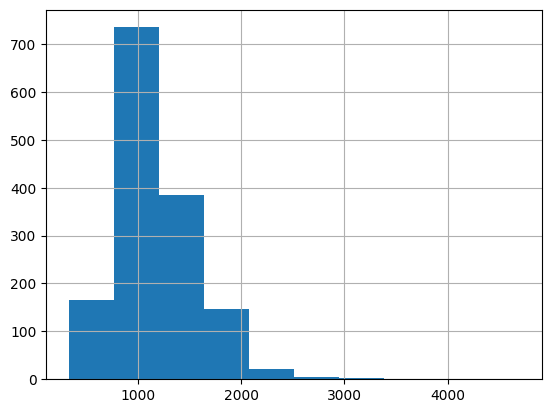

2ndFlrSF


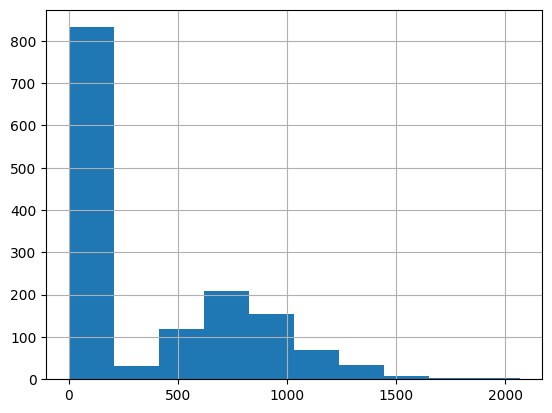

LowQualFinSF


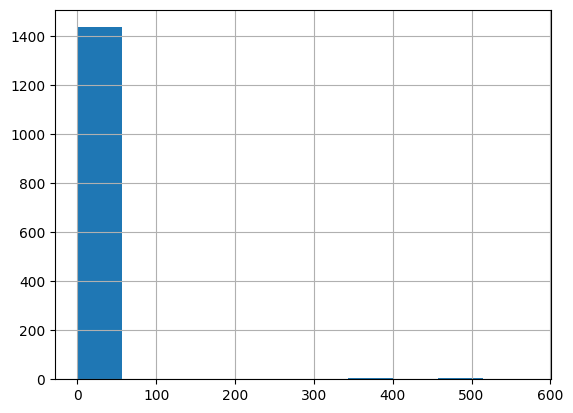

GrLivArea


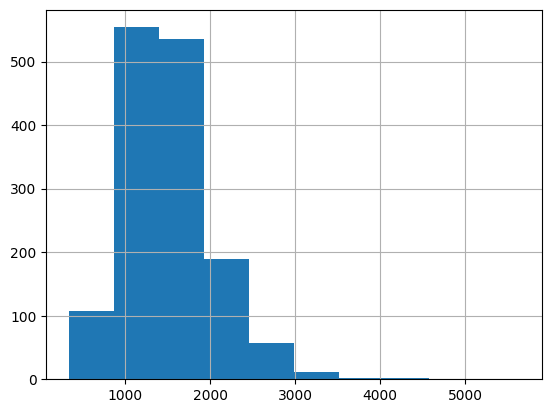

GarageArea


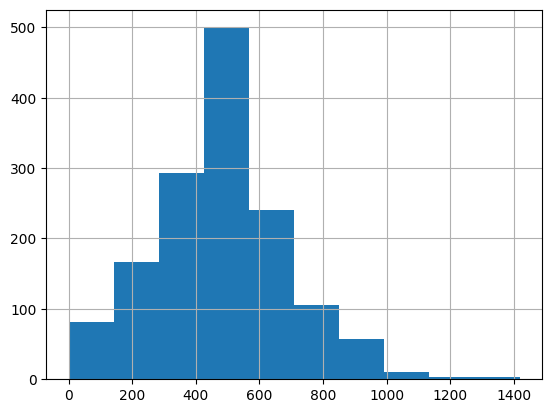

WoodDeckSF


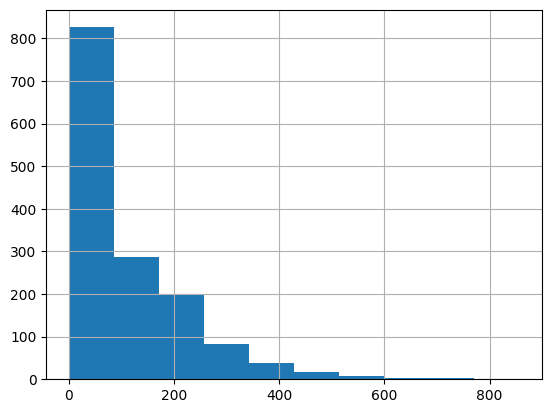

OpenPorchSF


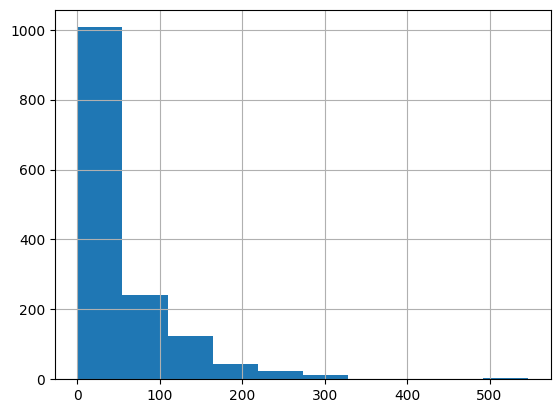

EnclosedPorch


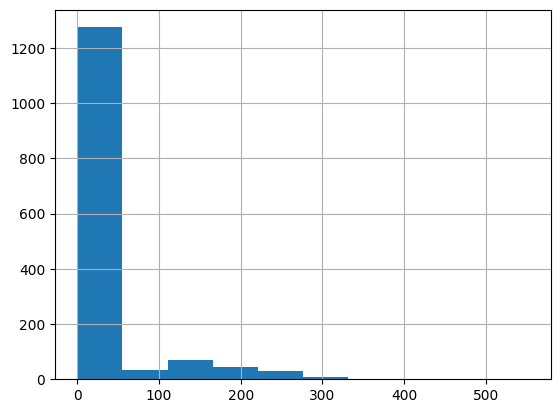

3SsnPorch


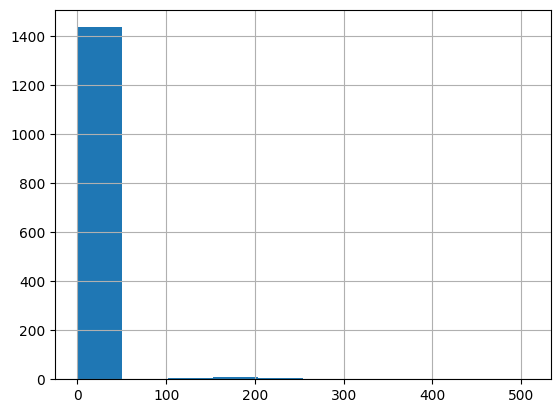

ScreenPorch


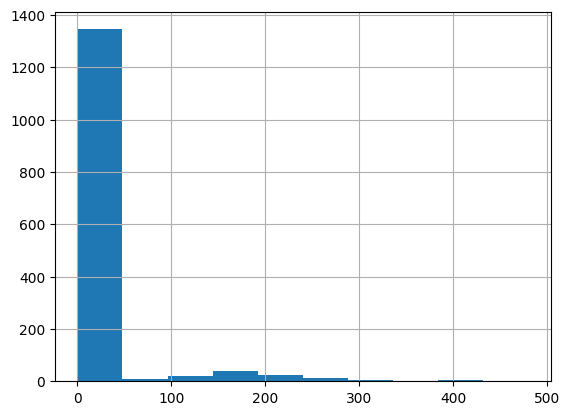

PoolArea


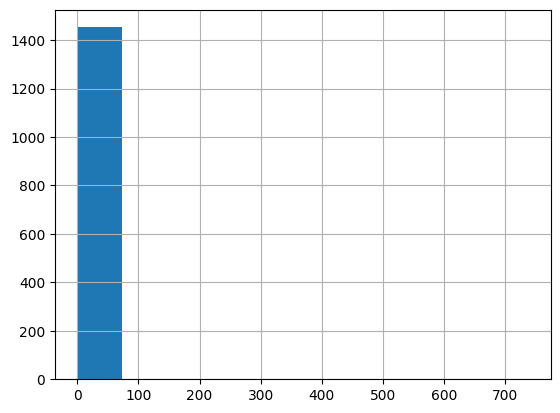

In [63]:
# For each area feature, plot their distribution in a histogram
for feature in area_features:
  print(feature)
  train_df[feature].hist()
  plt.show()

In [64]:
(train_df[area_features]<0).sum(axis=0)

LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [65]:
# For each area feature, create a new feature with _log suffix, with the value the np.log of the original value
for feature in area_features:
  train_df[feature+'_log']= np.log(train_df[feature] + 1)
  test_df[feature+'_log']= np.log(test_df[feature] + 1)

<Axes: >

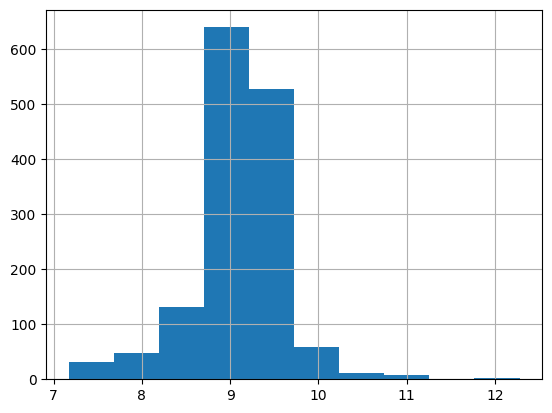

In [66]:
train_df['LotArea_log'].hist()

In [67]:
# Feature engineering - Create new feature (ex: years -> ages)
# First step, select age_features
age_features = [col for col in train_df.columns if 'Yr' in col or 'Year' in col]
age_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [68]:
# Second step, create new features
for df in (train_df, test_df):
  df['sold_age']= df ['YrSold'] - df ['YearBuilt']
  df['remod_age']= df ['YrSold'] - df ['YearRemodAdd']
  df['garage_age']=  df ['YrSold'] - df ['GarageYrBlt']
  df['transaction_age']=  DATASET_YEAR - df ['YrSold']

In [69]:
train_df.shape

(1460, 102)

In [70]:
features = train_df.drop(columns=list(categorical_features)+['Id', target_column]).columns
features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'LotArea_log', 'MasVnrArea_log', 'BsmtFinSF1_log',
       'BsmtFinSF2_log', 'BsmtUnfSF_log', 'TotalBsmtSF_log', '1stFlrSF_log',
       '2ndFlrSF_log', 'LowQualFinSF_log', 'GrLivArea_log', 'GarageArea_log',
       'WoodDeckSF_log', 'OpenPorchSF_log', 'EnclosedPorch_log',
       '3SsnPorch_log', 'ScreenPorch_log', 'PoolArea_log', 'sold_age',
       'remod_age', 'garage_age', 'transaction_age'],
      dtype='object')

In [71]:
# Here are the missing data points
# For now we can drop those columns
na_columns = train_df.isna().sum(axis=0)
na_columns[na_columns!=0]

LotFrontage        259
Alley             1369
MasVnrType         872
MasVnrArea           8
BsmtQual            37
BsmtCond            37
BsmtExposure        38
BsmtFinType1        37
BsmtFinType2        38
Electrical           1
FireplaceQu        690
GarageType          81
GarageYrBlt         81
GarageFinish        81
GarageQual          81
GarageCond          81
PoolQC            1453
Fence             1179
MiscFeature       1406
MasVnrArea_log       8
garage_age          81
dtype: int64

In [72]:
na_columns[na_columns!=0].index

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature', 'MasVnrArea_log', 'garage_age'],
      dtype='object')

In [73]:
na_test = test_df[features].isna().sum(axis=0)
missing_in_test_features = na_test[na_test>0].index

In [74]:
train_df = train_df.dropna(axis = 1)

In [75]:
features = [col for col in train_df.columns if col not in ('Id', target_column) and col not in categorical_features and col not in missing_in_test_features ]
features

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'LotArea_log',
 '1stFlrSF_log',
 '2ndFlrSF_log',
 'LowQualFinSF_log',
 'GrLivArea_log',
 'WoodDeckSF_log',
 'OpenPorchSF_log',
 'EnclosedPorch_log',
 '3SsnPorch_log',
 'ScreenPorch_log',
 'PoolArea_log',
 'sold_age',
 'remod_age',
 'transaction_age']

<Axes: >

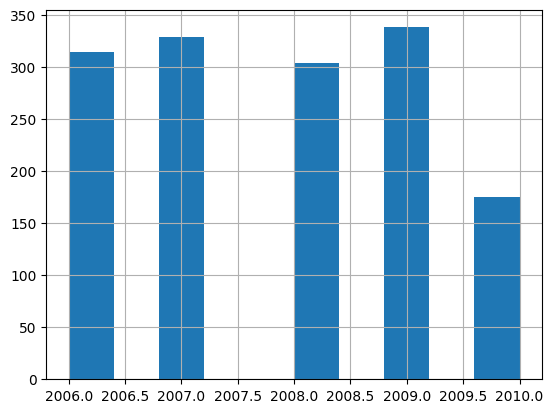

In [76]:
train_df['YrSold'].hist()

<Axes: >

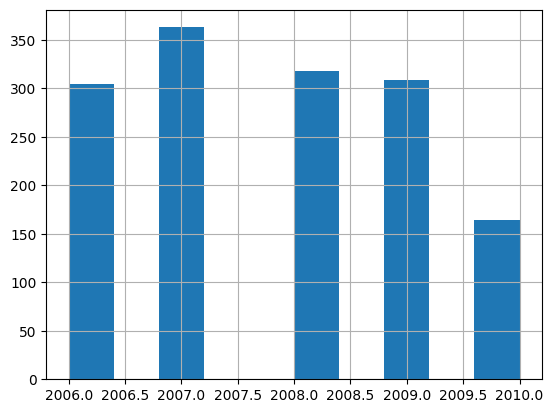

In [77]:
test_df['YrSold'].hist()

In [78]:
train_df[features]

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GrLivArea_log,WoodDeckSF_log,OpenPorchSF_log,EnclosedPorch_log,3SsnPorch_log,ScreenPorch_log,PoolArea_log,sold_age,remod_age,transaction_age
0,60,8450,7,5,2003,2003,856,854,0,1710,...,7.444833,0.000000,4.127134,0.000000,0.0,0.0,0.0,5,5,2
1,20,9600,6,8,1976,1976,1262,0,0,1262,...,7.141245,5.700444,0.000000,0.000000,0.0,0.0,0.0,31,31,3
2,60,11250,7,5,2001,2002,920,866,0,1786,...,7.488294,0.000000,3.761200,0.000000,0.0,0.0,0.0,7,6,2
3,70,9550,7,5,1915,1970,961,756,0,1717,...,7.448916,0.000000,3.583519,5.609472,0.0,0.0,0.0,91,36,4
4,60,14260,8,5,2000,2000,1145,1053,0,2198,...,7.695758,5.262690,4.442651,0.000000,0.0,0.0,0.0,8,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,953,694,0,1647,...,7.407318,0.000000,3.713572,0.000000,0.0,0.0,0.0,8,7,3
1456,20,13175,6,6,1978,1988,2073,0,0,2073,...,7.637234,5.857933,0.000000,0.000000,0.0,0.0,0.0,32,22,0
1457,70,9042,7,9,1941,2006,1188,1152,0,2340,...,7.758333,0.000000,4.110874,0.000000,0.0,0.0,0.0,69,4,0
1458,20,9717,5,6,1950,1996,1078,0,0,1078,...,6.983790,5.905362,0.000000,4.727388,0.0,0.0,0.0,60,14,0


In [79]:
# Define a cross validation procedure
# Tips: Use Kfold from SKlearn
kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

#linear_model = LinearRegression()
#linear_model = Lasso()
#linear_model = Ridge()
linear_model = ElasticNet(alpha=2.0, l1_ratio=0.7)

for idx_train, idx_val in kf.split(train_df):
  X_train = train_df.loc[idx_train, features]
  y_train =  train_df.loc[idx_train, target_column]
  X_val = train_df.loc[idx_val, features]
  y_val = train_df.loc[idx_val, target_column]
  linear_model = linear_model.fit(X=X_train, y=y_train)
  y_val_pred = linear_model.predict(X_val)
  y_val_pred[y_val_pred<0] =0
  score = mean_squared_log_error(y_true=y_val, y_pred=y_val_pred)
  print(score)

0.029939948886106318
0.03238950965283586
0.4359382185230971
0.04550101583722958
0.021606342381182322


/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.450e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.756e+11, tolerance: 7.213e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6

In [80]:
# Do the same operations using sklearn cross_val_score method

cross_val_score(estimator=ElasticNet(), X=train_df[features], y=train_df[target_column], scoring='neg_mean_squared_log_error')

/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.175e+11, tolerance: 7.592e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.458e+11, tolerance: 7.288e+08
  model = cd_fast.enet_coordinate_descent(
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1000: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/jo/anaconda3/lib/pyth

array([-0.02692626,         nan, -0.02965093, -0.04794572, -0.03967746])

In [81]:
# Perform a grid search accross several models
# Tips: use GridSearchCV from sklearn
grid_search = GridSearchCV(estimator=ElasticNet(),
                           param_grid={'alpha':[0,0.1, 0.2, 0.5, 0.9, 1, 1.1, 1.2, 1.5, 2.0],
                                       'l1_ratio':[0,0.1, 0.2, 0.5, 0.9, 1, 1.1, 1.2, 1.5, 2.0],},
                           scoring='neg_mean_squared_log_error')

grid_search.fit(X=train_df[features], y=train_df[target_column])

/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/jo/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.505e+11, tolerance: 7.592e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_f

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0, 0.1, 0.2, 0.5, 0.9, 1, 1.1, 1.2, 1.5,
                                   2.0],
                         'l1_ratio': [0, 0.1, 0.2, 0.5, 0.9, 1, 1.1, 1.2, 1.5,
                                      2.0]},
             scoring='neg_mean_squared_log_error')

In [82]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
95,0.018393,0.000355,0.000561,0.000105,2.0,1.0,"{'alpha': 2.0, 'l1_ratio': 1}",-0.033723,-0.043562,-0.035824,-0.038095,-0.037870,-0.037815,0.003281,1
85,0.018764,0.000401,0.000526,0.000027,1.5,1.0,"{'alpha': 1.5, 'l1_ratio': 1}",-0.033750,-0.043558,-0.035863,-0.038081,-0.037859,-0.037822,0.003268,2
75,0.017908,0.000209,0.000529,0.000037,1.2,1.0,"{'alpha': 1.2, 'l1_ratio': 1}",-0.033766,-0.043555,-0.035886,-0.038073,-0.037852,-0.037826,0.003260,3
65,0.019087,0.001143,0.000535,0.000046,1.1,1.0,"{'alpha': 1.1, 'l1_ratio': 1}",-0.033771,-0.043554,-0.035894,-0.038070,-0.037850,-0.037828,0.003257,4
55,0.018015,0.000362,0.000504,0.000016,1.0,1.0,"{'alpha': 1, 'l1_ratio': 1}",-0.033776,-0.043553,-0.035902,-0.038067,-0.037848,-0.037829,0.003255,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,0.020364,0.000170,0.000578,0.000072,0.5,0.2,"{'alpha': 0.5, 'l1_ratio': 0.2}",-0.026612,NaN,-0.029812,-0.049784,-0.039394,NaN,NaN,32
31,0.020173,0.000176,0.000586,0.000130,0.5,0.1,"{'alpha': 0.5, 'l1_ratio': 0.1}",-0.026754,NaN,-0.029716,-0.048800,-0.039527,NaN,NaN,32
30,0.020092,0.000314,0.000580,0.000064,0.5,0.0,"{'alpha': 0.5, 'l1_ratio': 0}",-0.026926,NaN,-0.029651,-0.047946,-0.039677,NaN,NaN,32
39,0.000267,0.000009,0.000000,0.000000,0.5,2.0,"{'alpha': 0.5, 'l1_ratio': 2.0}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,32


In [83]:
grid_search.predict(train_df[features])

array([216226.75843732, 183259.98395983, 219399.75980041, ...,
       249242.93583571, 143761.81750611, 161549.2260731 ])

In [84]:
# Final step for the kaggle: submit your result!
# Perform data transformation on test_df also first!

y_hat_test = grid_search.predict(X=test_df[features])

submission_df = pd.DataFrame({'Id': test_df['Id'], target_column: y_hat_test})
submission_df.to_csv('../data/Predict/submission_pipeline.csv', index=False)

In [85]:
# APPENDIX: How to package your model in a Sklearn Pipeline
# Package your model in a pipeline
# https://medium.com/mlearning-ai/neat-data-preprocessing-with-pipeline-and-columntransformer-2a0468865b6b

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer




In [86]:
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

numerical_df = train_df.select_dtypes(include='number')
categorical_df = train_df.select_dtypes(exclude='number')

num_cols = [col for col in numerical_df.columns if col not in ('Id', target_column)]
cat_cols = list(categorical_df.columns)

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale',MinMaxScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('one-hot',OneHotEncoder(handle_unknown='ignore'))
])


col_trans = ColumnTransformer(transformers=[
    ('num_pipeline',num_pipeline,num_cols),
    ('cat_pipeline',cat_pipeline,cat_cols)
    ],
    remainder='drop',
    n_jobs=-1)

mlr= LinearRegression()

reg_pipeline = Pipeline(steps=[
    ('col_trans', col_trans),
    ('model', mlr)
])

def custom_msle(y_true, y_pred):
  y_pred = np.clip(y_pred, 0, None)
  return mean_squared_log_error(y_true=y_true, y_pred=y_pred)

sklearn.model_selection.cross_val_score(estimator=reg_pipeline,
                                        X=train_df.drop(columns=['Id', target_column]),
                                        y=train_df[target_column],
                                        scoring=sklearn.metrics.make_scorer(custom_msle, greater_is_better=False)
                                        )

FileNotFoundError: [Errno 2] No such file or directory: '/content/train.csv'

In [ ]:
reg_pipeline

Pipeline(steps=[('col_trans',
                 ColumnTransformer(n_jobs=-1,
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   MinMaxScaler())]),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF...
                                                   'LandContour', 'Utilities',
                                                   'LotConfig', 'LandSlope',
                                                   'Neighborhood', 'Condition1',
                                                   'Condition2', 'BldgType',
                                                   'HouseStyle', 'RoofStyle',
                                                   'RoofMatl', 'Exterior1st',
                                                   'Exterior2nd', 'MasVnrType',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'BsmtQual',
                                                   'BsmtCond', 'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', ...])])),
                ('model', LinearRegression())])

In [ ]:
# Very bad scores due to dimensionality curse and lack of proper feature engineering

In [ ]:
train_df.drop(columns=['Id', target_column])

In [ ]:
reg_pipeline.fit(X=train_df.drop(columns=['Id', target_column]), y=train_df[target_column])

In [ ]:
y_hat_test =reg_pipeline.predict(X=test_df.drop(columns=['Id']))